## Revised Simulation Analysis

1. True population density analysis (model precision and accuracy) of entire data set. Between total hits and actual hits.

2. Density estimation changes between multiple combinations (animals, paths, camera, uav_paths, uav_speed, bias)

In [25]:
#clear environments
rm(list=ls())

suppressMessages(library(tidyverse))
suppressMessages(library(data.table))
library(geosphere)
suppressMessages(library(reshape2))
library(ggthemes)

mydir = "../Data/Simulations/HPC4/"
all_sims = list.files(path=mydir, pattern="*.csv", full.names=TRUE) %>%
                map_df(~fread(.))


current_sims <- split(all_sims,rep(1:100,each=1344))
#current_sims

# Timesteps of simulation runs
timestep <- 10000

Warning message in split.default(x = seq_len(nrow(x)), f = f, drop = drop, ...):
“data length is not a multiple of split variable”

In [28]:
Animal <- rep(unique(all_sims$Animal), 6)
Camera <- c(rep('garmin', 16), rep('sony', 16), rep('nadir', 16))
Speed <- c(rep(1, 8), rep(2, 8), rep(1, 8), rep(2, 8), rep(1, 8), rep(2, 8))

cam_table <-data.frame(Animal,Camera, Speed)
#cam_table <- merge(cam_table, Speed)
#cam_table
g_h <- 83.33 
s_h <- 113.83
n_h <- 154.29

reef <- 0.64
nurse <- 0.37
whale <- 0.6
ray <- 1.42
manatee <- 0.7
booby <- 10.5
frigate <- 4.5
tern <- 8.5

Animal <- c("reef", "nurse", "whale_shark", "ray", "manatee", "booby", "frigate", "tern")
animals_speeds <- c(reef, nurse, whale, ray, manatee, booby, frigate, tern)
speeds <- cbind(Animal, animals_speeds)

unique_animals = unique(cam_table$Animal)

cam_table <- merge(cam_table, speeds) # merge to get animal speeds
#cam_table
splevel <- data.frame(Speed=c(1,2), level = c(17.22, 18.8))

unique_speed = unique(cam_table$Speed)

cam_table <- merge(cam_table, splevel) 

abs_vel <- apply(cam_table, 1, function(x) as.numeric(x[4])+as.numeric(x[5]))

cam_table <- cbind(cam_table, abs_vel)

hz <- data.frame(Camera = c('garmin', 'sony', 'nadir'), h_level = c(g_h, s_h, n_h))

unique_h = unique(cam_table$Camera)
                 
cam_table <- merge(cam_table, hz)                  

Area_km <- apply(cam_table, 1, function(x) (10000*as.numeric(x[6])*as.numeric(x[7]))/1000000)
 
cam_table <- cbind(cam_table, Area_km)                
                 
cam_table <- cam_table[, -c(4:7)]
                 
#length(unique(cam_table$Area_km))
#cam_table
                 
#unique_cams = unique(all_sims$Camera)
#unique_animals = unique(all_sims$Animal)
#unique_speed = c(1, 2)
           
all_sims = merge(all_sims, cam_table, by = c("Camera", "Speed", "Animal"))
#all_sims

In [72]:
cam_table2

Camera,Speed,Area2_km
<fct>,<dbl>,<dbl>
garmin,1,14.34943
garmin,2,15.66604
sony,1,19.60153
sony,2,21.40004
nadir,1,26.56874
nadir,2,29.00652


In [32]:
# Add area

# Overlap calculated by calculating the number of average timesteps 
# necessary to traverse image width - this dependent on camera (FOV), speed(1,2) 
# Area covered by each camera appended to simulation data

Animals <- rep(unique(all_sims$Animal), 6)
Camera <- c("garmin", "garmin", "sony", "sony", "nadir", "nadir")
Speed <-c(1, 2, 1, 2, 1, 2)


g_h <- 83.33 
s_h <- 113.83
n_h <- 154.29

Area2_km <- c(((10000 * 17.22 * g_h)/1000000), ((10000 * 18.8 * g_h)/1000000), ((10000 * 17.22 * s_h)/1000000), 
             ((10000 * 18.8 * s_h)/1000000), ((10000 * 17.22 * n_h)/1000000),  ((10000 * 18.8 * n_h)/1000000)) # Converting to kilometres2

cam_table2 <- data.frame(Camera, Speed, Area2_km)

#cam_table

unique_cams = unique(all_sims$Camera)
unique_speed = c(1, 2)

all_sims = merge(all_sims, cam_table2, by = c('Camera', 'Speed'))
all_sims$Area2_km <- sapply(all_sims$Area2_km, function(x) x + mean(animals_speeds))
head(all_sims)

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Area2_km
<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
garmin,1,booby,straight,lawnmower,yes,0,0,23.09908,17.75318
garmin,1,booby,straight,lawnmower,no,0,0,23.09908,17.75318
garmin,1,booby,straight,figure8,yes,0,0,23.09908,17.75318
garmin,1,booby,straight,figure8,no,0,0,23.09908,17.75318
garmin,1,booby,stop25,lawnmower,yes,0,0,23.09908,17.75318
garmin,1,booby,stop25,lawnmower,no,0,0,23.09908,17.75318


In [5]:
#df[df$aged <= df$laclen, ] 
#a <- subset(all_sims, all_sims$Actual_hits == 34)

#levels(as.factor(a$UAV_path))
#a

In [33]:
#b <- subset(all_sims, all_sims$Actual_hits > 22)
#b
#print(length(unique(Area2_km)))

In [34]:
# Add true density estimate
True_Density <- rep((1/25), 134400)
all_sims <- cbind(all_sims, True_Density)
head(all_sims)

Warning message in data.table::data.table(...):
“Item 1 is of size 115584 but maximum size is 134400 (recycled leaving remainder of 18816 items)”

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Area2_km,True_Density
<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
garmin,1,booby,straight,lawnmower,yes,0,0,23.09908,17.75318,0.04
garmin,1,booby,straight,lawnmower,no,0,0,23.09908,17.75318,0.04
garmin,1,booby,straight,figure8,yes,0,0,23.09908,17.75318,0.04
garmin,1,booby,straight,figure8,no,0,0,23.09908,17.75318,0.04
garmin,1,booby,stop25,lawnmower,yes,0,0,23.09908,17.75318,0.04
garmin,1,booby,stop25,lawnmower,no,0,0,23.09908,17.75318,0.04


In [35]:
# Density Calculations

calcDensity <- function(z, A){
  # Calculate density using ideal gas model from capture rate and survey area covered
  # z : The number of encounters/captures.
  # A : Area covered by sensor per unit time.
  
  # Double check parameters: will be < 0 or double
  #if(z < 0 | !is.numeric(z)) stop("Number of individuals must be a positive number")
  #if (A <= 0 | !is.numeric(A)) stop("Area, A, must be a positive number.")
    
  # Calculate density
  return(D <- z/A)
}



# Calculate density per simulation
Density_km <- calcDensity(all_sims$Actual_hits, all_sims$Area_km)
all_sims <- cbind(all_sims, Density_km)
#head(all_sims)

Strip_Density <- calcDensity(all_sims$Actual_hits, all_sims$Area2_km)
all_sims <- cbind(all_sims, Strip_Density)

In [36]:
head(all_sims)

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Area2_km,True_Density,Density_km,Strip_Density
<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
garmin,1,booby,straight,lawnmower,yes,0,0,23.09908,17.75318,0.04,0,0
garmin,1,booby,straight,lawnmower,no,0,0,23.09908,17.75318,0.04,0,0
garmin,1,booby,straight,figure8,yes,0,0,23.09908,17.75318,0.04,0,0
garmin,1,booby,straight,figure8,no,0,0,23.09908,17.75318,0.04,0,0
garmin,1,booby,stop25,lawnmower,yes,0,0,23.09908,17.75318,0.04,0,0
garmin,1,booby,stop25,lawnmower,no,0,0,23.09908,17.75318,0.04,0,0


In [37]:
Prop_err <- apply(all_sims, 1, function(x) ((as.numeric(x[12]) - as.numeric(x[11])) /as.numeric(x[11]))*100)
Strip_err <- apply(all_sims, 1, function(x) ((as.numeric(x[13]) - as.numeric(x[11])) /as.numeric(x[11]))*100)

In [38]:
all_sims <- cbind(all_sims, Prop_err)
all_sims <- cbind(all_sims, Strip_err)

In [39]:
median(Prop_err)
median(Strip_err)

IQR(Density_km)
IQR(Strip_Density)

[1] -13.07268

[1] -16.59018

[1] 0.1000201

[1] 0.09256325

[1] -100

[1] 150.0502

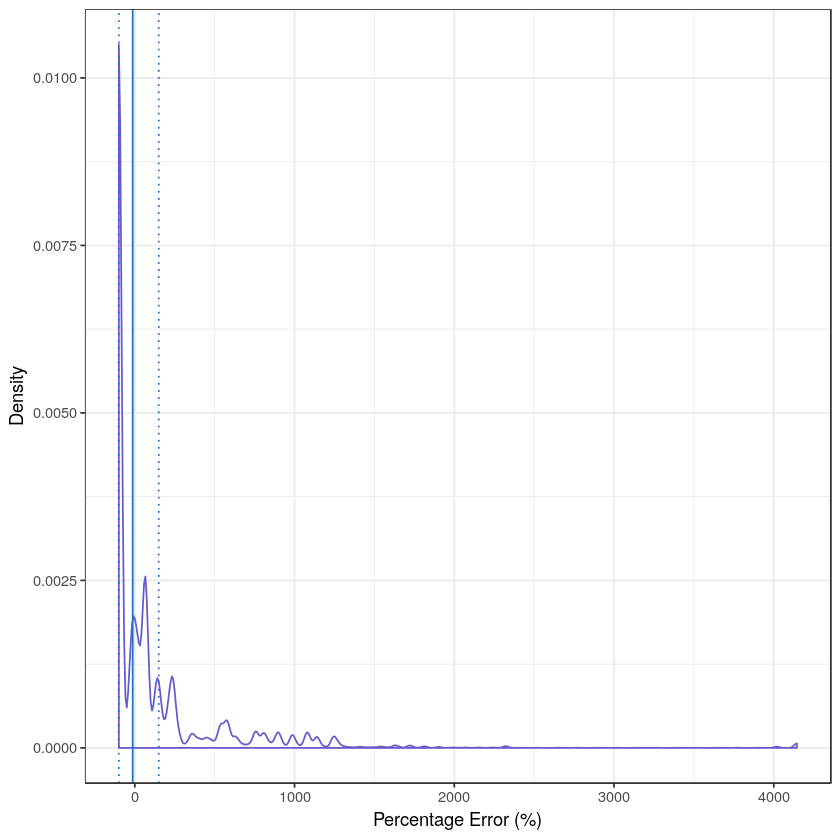

In [40]:
# Precision and Accuracy overall

#median(Prop_err)
#max(Prop_err)
#min(Prop_err)
order_prop <- sort(Prop_err)
lower = order_prop[0.25*length(order_prop)]
upper = order_prop[0.75*length(order_prop)]
lower
upper

all_sim_err <- ggplot(data = all_sims, aes(x = Prop_err)) + 
                geom_density(colour = 'slateblue') +
                xlab("Percentage Error (%)") +
                ylab('Density') +
                theme_bw() +
                geom_vline(xintercept = median(Prop_err), color = 'dodgerblue3') +
                geom_vline(xintercept = lower, color = 'dodgerblue3', linetype = 'dotted') +
                geom_vline(xintercept = upper, color = 'dodgerblue3', linetype = 'dotted')

all_sim_err

In [12]:
pdf(file = paste("../Results/Err_density.jpg"))
print(all_sim_err)
dev.off()

png 
  2

In [21]:
min(all_sims$Prop_err)
median(all_sims$Prop_err)
#sd(all_sims$Prop_err)
IQR(all_sims$Density_km)

[1] -100

[1] -9.2763

[1] 0.09804721

,Abundance,Total_Encounters
,<dbl>,<dbl>
2,10,11
3,20,56
4,30,39
5,40,146
6,50,97
7,60,188
8,70,123
9,80,195
10,90,184


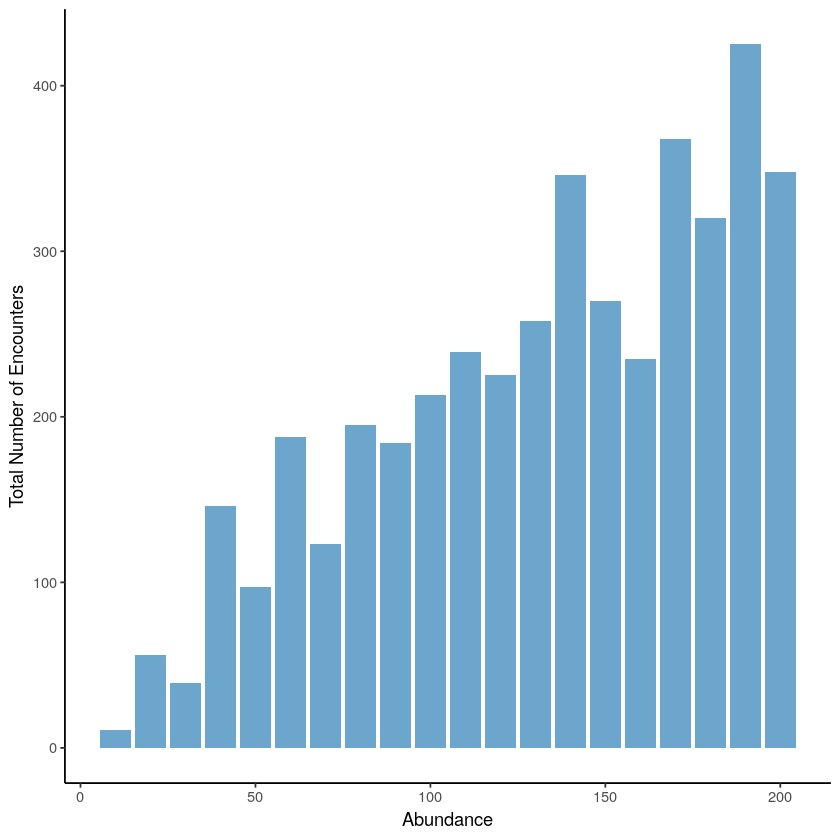

In [41]:
# Number of Animals/ Encounters until precision / accuracy levels off

# Abundance
abundance_gen <- function(n, df = all_sims){
    # Randomly select rows to represent abundance
    n <- sample_n(df, n)
    return(n)
}


abundance_density <- function(df){
    z <- sum(df$Actual_hits)
    A <- 25
    density <- calcDensity(z, A)
    return(density)
}

#random10 <- abundance_gen(10)
#random10
#random30 <- abundance_gen(30)
#random50 <- abundance_gen(50)
#random70 <- abundance_gen(70)
#random100 <- abundance_gen(100)
#random120 <- abundance_gen(120)

abund_table <- function(str_list){
    # Calculate the overall density and standard distribution for subset
    table <- data.frame('Abundance'= 0, 'Encounters'=0)
    for(i in str_list){
        true_den <- i/25 # True density
        set <- abundance_gen(i) 
        #density <- abundance_density(set) #Calculated density for that area
        #iqr <- IQR(density) # Precision
        ent <- sum(set$Actual_hits)
        row <- c(i, ent)
        table <- rbind(table, row)
    }
    table <- table[-1,]
    colnames(table) <- c("Abundance", "Total_Encounters")
    return(table)
}
    




abundances <- c(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200)
#abundances <- c(100, 200, 500, 700, 1000)
                                
                                
ab <- abund_table(abundances)
#colnames(ab) <- c("Abundance", "Density", "SD")
ab

    
ab_tab <- function(str_list){
    den_table <- c()
    for(i in str_list){
        #den <- c()
        for(j in 1:100){
            set <- abundance_gen(i)
            density <- abundance_density(set)
            den_table <- c(den_table, density)
        }
    }
    return(den_table)
}

    
    
    
    
    
abund_graph <- ggplot(ab, aes(x = Abundance, y = Total_Encounters)) +
                    geom_bar(stat = 'identity', fill = 'skyblue3') +
                    #geom_errorbar(aes(ymin=Density-(SD/2), ymax = Density+(SD/2)), width=.15,
                    #position=position_dodge(0.05), colour='darkblue') + 
                    ylab("Total Number of Encounters") +
                    theme_classic()
abund_graph

In [42]:
pdf(file = paste("../Results/encount_abund.pdf"))
print(abund_graph)
dev.off()

png 
  2

In [126]:
#test <- abunda[20,]
#test
#est_test <- abunda[20,2:101]
#est_test
#sapply(est_test, function(x) ((x-200)/200)*100)

In [71]:
# Abundace accuracy and precision

t <- ab_tab(abundances)
length(t)
d <- as.data.frame(matrix(t, ncol = 100,  byrow = TRUE), stringsAsFactors = FALSE)
abunda <- cbind(abundances, d)
prec <- apply(d, 1, function(x) IQR(x))
prec
              
cv <- apply(d, 1, function(x) (sd(x)/mean(x))*100)



acc <- c()
for(i in 1:nrow(abunda)){
    true <- abunda[i,1]
    est <- as.numeric(abunda[i, 2:101])
    perc <- sapply(est, function(x) ((x - true)/true)*100)
    #print(perc)
    acc <- c(acc, perc)
}

#acc
accuracy <- as.data.frame(matrix(acc, ncol = 100,  byrow = TRUE), stringsAsFactors = FALSE)
med_acc <- apply(accuracy, 1, function(x) median(x))
#med_acc

[1] 2000

[1] 0.60 0.74 1.11 1.22 1.11 1.70 2.04 1.56 1.82 1.92 2.06 2.04 2.02 2.61 2.81
[16] 2.65 2.50 2.52 2.96 2.77

In [69]:
abunda_tab

Abundance,Accuracy(Median Percentage Error (%)),DensityIQR,CV
<dbl>,<dbl>,<dbl>,<dbl>
10,-94.20000,0.60,67.37793
20,-91.80000,0.97,40.87065
30,-92.06667,0.93,34.47295
40,-92.30000,1.26,31.48216
50,-91.64000,1.85,30.63974
60,-92.06667,1.28,22.49208
70,-92.02857,1.78,22.07762
80,-91.95000,2.19,21.60610
90,-92.13333,1.73,20.88352


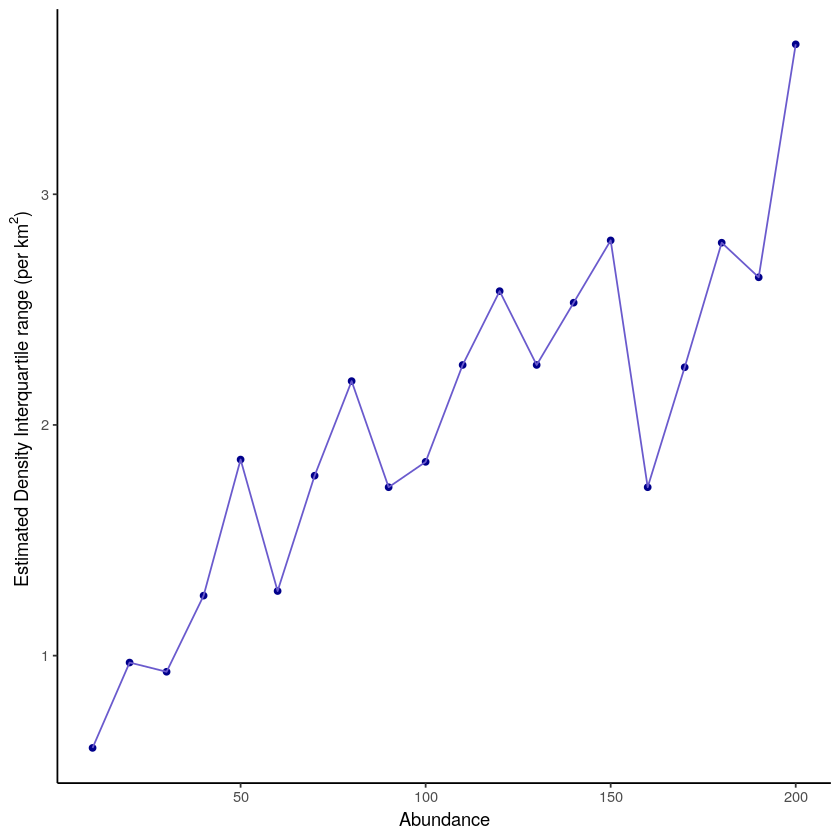

In [44]:
abunda_tab <- cbind(abundances, med_acc, prec, cv)
colnames(abunda_tab) <- c("Abundance", "Accuracy(Median Percentage Error (%))","DensityIQR", "CV")
abunda_tab <- as.data.frame(abunda_tab)
                 
                 
abunda_plot <- ggplot(abunda_tab, aes(x=Abundance, DensityIQR)) +
                  geom_point(colour="darkblue")+
                  geom_line(colour='slateblue') +
                  xlab("Abundance")+
                  ylab(expression(paste("Estimated Density Interquartile range (per ", km^2,")", sep=" "))) +
                  theme_classic() 

abunda_plot

In [45]:
abunda_tab

Abundance,Accuracy(Median Percentage Error (%)),DensityIQR,CV
<dbl>,<dbl>,<dbl>,<dbl>
10,-94.20000,0.60,67.37793
20,-91.80000,0.97,40.87065
30,-92.06667,0.93,34.47295
40,-92.30000,1.26,31.48216
50,-91.64000,1.85,30.63974
60,-92.06667,1.28,22.49208
70,-92.02857,1.78,22.07762
80,-91.95000,2.19,21.60610
90,-92.13333,1.73,20.88352


In [46]:
pdf(file = paste("../Results/Prec_abund.pdf"))
print(abunda_plot)
dev.off()

png 
  2

In [47]:
library(xtable)
abund_table <- xtable(abunda_tab)
print.xtable(abund_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/abund_table.tex",
             include.rownames = F)

Actual_hits,Encounters,Accuracy,Precision,CV
<int>,<int>,<dbl>,<dbl>,<dbl>
0,59903,-100.00000,0.000000000,NaN
1,30237,17.82497,0.029609327,29.930787
2,14739,145.11802,0.050023265,26.140544
3,7697,238.92865,0.043583342,24.468301
4,2346,352.83662,0.139258154,31.262526
5,1538,590.63535,0.114698237,28.153666
6,2045,587.40455,0.157864988,26.411117
7,5055,760.79525,0.214742378,27.360996
8,6204,805.67323,0.205521341,27.395706


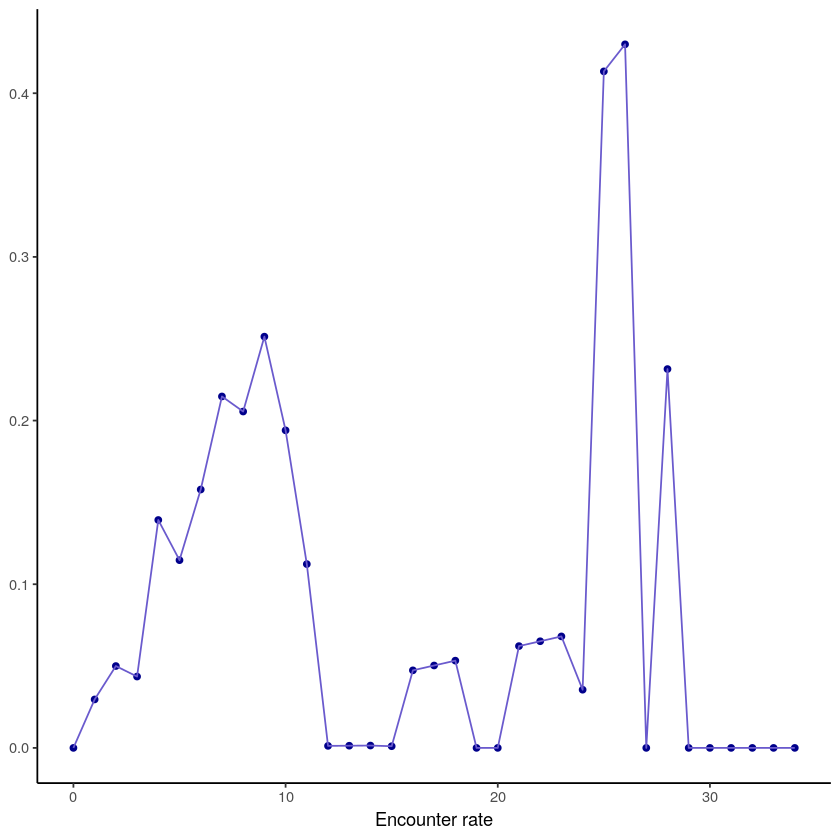

In [48]:
# For each group of encounters, what was the density calculation and error
# Subset all_sims by number of encounters, counting the amount in that category and the total area
capt_err <- all_sims %>% 
            group_by(Actual_hits) %>%
                summarise(Encounters = length(Actual_hits),
                          Accuracy = median(Prop_err),
                          Precision = IQR(Density_km),
                          CV = (sd(Density_km)/mean(Density_km))*100)

capt_err
hit_plot <- ggplot(capt_err, aes(x=Actual_hits, y = Precision)) +
                  geom_point(colour="darkblue")+
                  geom_line(colour='slateblue') +
                  xlab("Encounter rate")+
                  ylab(expression(paste("Estimated Density Interquartile range (per ", km^2,")", sep=" "))) +
                  theme_classic() +
                  theme(axis.title.y=element_blank())

#pdf(file = paste("../Results/encounters_density.pdf"))
print(hit_plot)
#dev.off()
#hit_tab <- hit_tab[,-6]
#cols <- c('Number of Encounters', 'Frequency', 'Area (km)', 'Density (per km2)', 'Standard Deviation')
#colnames(hit_tab) <- cols


In [49]:
write.table(capt_err, file = "../Results/encount_table.txt")

In [50]:
encount_table <- xtable(capt_err)
print.xtable(encount_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/encount_table.tex",
             include.rownames = F)

In [51]:
pdf(file = paste("../Results/Err_encount.pdf"))
print(hit_plot)
dev.off()

png 
  2

### Model precision and accuracy between groups

Animal,Accuracy,Precision,Encounter,Mean_Cruise
<fct>,<dbl>,<dbl>,<int>,<dbl>
nurse,129.13485,0.23811531,68152,0.37
whale_shark,150.56578,0.14920349,65658,0.60
reef,67.97985,0.09928197,46162,0.64
manatee,67.41740,0.09898634,46469,0.70
ray,-13.07268,0.06438026,23947,1.42
frigate,-100.00000,0.02984025,11038,4.50
tern,-100.00000,0.00000000,7540,8.50
booby,-100.00000,0.00000000,7037,10.50


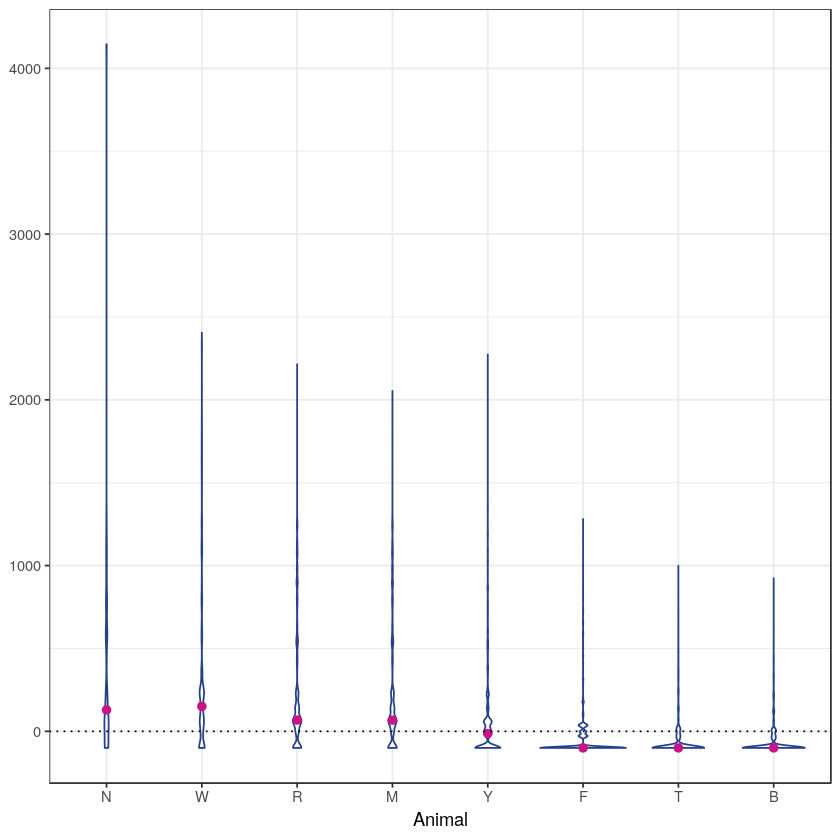

In [52]:
# Animal movement - path and speed

animal_err <-  all_sims %>% 
            group_by(Animal) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km), 
                        Encounter = sum(Actual_hits))

animal_err <- as.data.frame(animal_err)
Mean_Cruise <- c(10.5, 4.5, 0.7, 0.37, 1.42, 0.64, 8.5, 0.6)
animal_err <- cbind(animal_err, Mean_Cruise)

level.order = c('nurse','whale_shark', 'reef', 'manatee', 'ray','frigate', 'tern', 'booby')
animal_err <- animal_err[order(factor(animal_err$Animal, levels = level.order)),]
rownames(animal_err) <- NULL
animal_err

animal_labels <- c("N", "W", "R", "M", "Y", "F", "T", "B")
ani_box <- all_sims %>% 
             group_by(Animal) %>%
                ggplot(aes(x = Animal, y = Prop_err)) +
                geom_violin(colour = 'royalblue4') +
                stat_summary(fun.y=median, geom="point", size=2, color="mediumvioletred") +
                ylab("Percentage Error (%)") +
                xlab('Animal') +
                theme_bw() +
                theme(axis.title.y=element_blank()) +
                geom_hline(yintercept = 0, linetype = 'dotted', colour = 'black') +
                scale_x_discrete(limits = level.order, labels= animal_labels)
#ani_box

ani_box

In [53]:
pdf(file = paste("../Results/animal_box.pdf"))
print(ani_box)
dev.off()

png 
  2

In [54]:
#write.table(ani_err, file = "../Results/animal_table.txt")
ani_table <- xtable(animal_err)
print.xtable(ani_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/ani_table.tex",
             include.rownames = F)

Animal_path,Accuracy,Precision,Encounters
<chr>,<dbl>,<dbl>,<int>
straight,23.24678,0.10002008,39994
stop25,23.24678,0.10002008,39819
stop50,23.24678,0.10002008,39884
stop75,23.24678,0.10002008,39861
random60,-100.00000,0.03380961,22642
random120,-100.00000,0.04748206,27796
random180,67.97985,0.29031585,66007


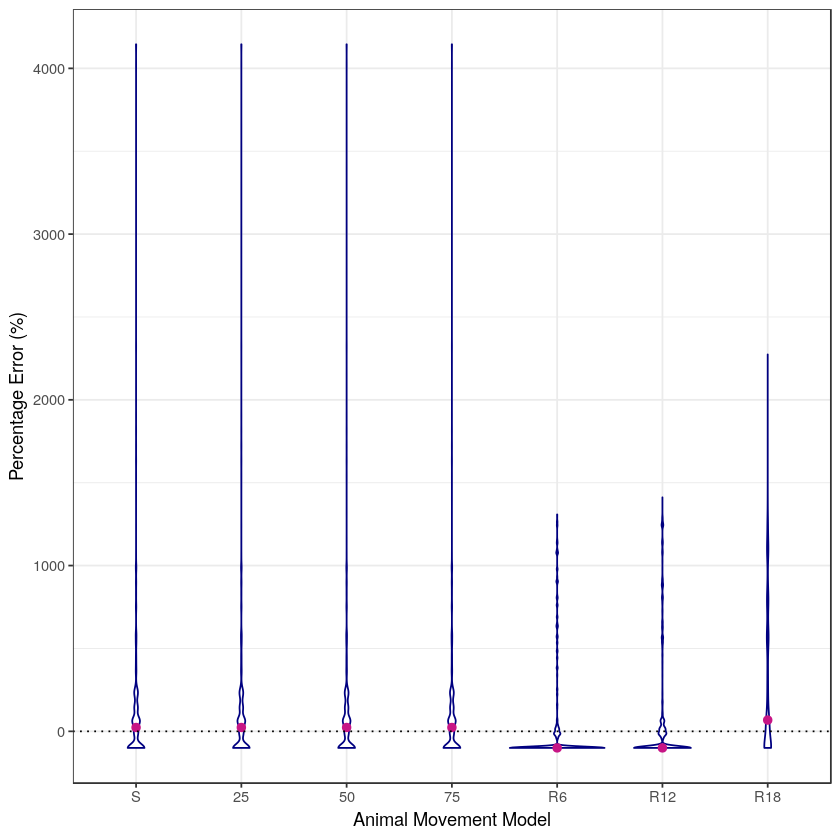

In [67]:
# Path

movement_err <- all_sims %>% 
            group_by(Animal_path) %>%
                 summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km),
                          Encounters = sum(Actual_hits))  

movement_err <- as.data.frame(movement_err)
level.order = c('straight','stop25', 'stop50', 'stop75', 'random60',
                                            'random120', 'random180')

movement_err <- movement_err[order(factor(movement_err$Animal_path, levels = level.order)),]
rownames(movement_err) <- NULL


path_labels <- c("S", "25", "50", "75","R6", "R12", "R18")
anip_box <- all_sims %>% 
             group_by(Animal_path) %>%
                ggplot(aes(x = Animal_path, y = Prop_err)) +
                geom_violin(colour = 'navy') +
                stat_summary(fun.y=median, geom="point", size=2, color="mediumvioletred") +
                ylab("Percentage Error (%)") +
                xlab('Animal Movement Model') +
                theme_bw() +
                geom_hline(yintercept = 0, linetype = 'dotted', colour = 'black') +
                scale_x_discrete(limits = level.order, labels= path_labels)


                

movement_err
anip_box

In [56]:
pdf(file = paste("../Results/anip_box.pdf"))
print(anip_box)
dev.off()

png 
  2

In [68]:
#write.table(movement_err, file = "../Results/anip_table.txt")
library(xtable)
amov_table <- xtable(movement_err)
print.xtable(amov_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/amov_table.tex",
             include.rownames = F)

In [68]:
# Availability bias
# Remove birds - no bias estimates

bias_animals <- c('reef', 'nurse', 'whale_shark', 'ray', 'manatee')
bias_all_sims <- subset(all_sims, all_sims$Animal == bias_animals)

bias_err <-  bias_all_sims %>% 
            group_by(Bias) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km))



bias_box <- bias_all_sims %>% 
             group_by(Bias) %>%
                ggplot(aes(x = Bias, y = Density_km)) +
                geom_boxplot(colour = 'dodgerblue4') +
                xlab('Bias') +
                theme_bw()
bias_err
#bias_box
wilcox.test(Density_km ~ Bias, data = all_sims)

Bias,Accuracy,Precision
<chr>,<dbl>,<dbl>
no,67.97985,0.1478961
yes,67.97985,0.1478961



	Wilcoxon rank sum test with continuity correction

data:  Density_km by Bias
W = 2255900000, p-value = 0.768
alternative hypothesis: true location shift is not equal to 0


In [148]:
write.table(bias_err, file = "../Results/bias_table.txt")

In [149]:
nrow(bias_all_sims)/2

[1] 8624

In [150]:
# Animal movement - path and speed

cam_err <-  all_sims %>% 
            group_by(Camera) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km))

cam_den <- all_sims %>% 
            group_by(Camera) %>%
                summarise(Density = mean(Density_km),
                          SD = sd(Density_km))

cam_box <- all_sims %>% 
             group_by(Camera) %>%
                ggplot(aes(x = Camera, y = Prop_err)) +
                geom_boxplot(colour = 'maroon4') +
                ylab("Percentage Error (%)") +
                xlab('Camera') +
                theme_bw()

#cam_den
#cam_err
#cam_box

In [151]:
write.table(cam_err, file = "../Results/cam_table.txt")

In [152]:
pdf(file = paste("../Results/cam_box.jpg"))
print(cam_box)
dev.off()

png 
  2

In [153]:
spee_err <- all_sims %>% 
            group_by(Speed) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km))

spee_den <- all_sims %>% 
            group_by(Speed) %>%
                summarise(Density = mean(Density_km),
                          SD = sd(Density_km))

spee_box <- all_sims %>% 
             group_by(Speed) %>%
                ggplot(aes(x = as.factor(Speed), y = Prop_err)) +
                geom_boxplot(colour = 'violetred3') +
                ylab("Percentage Error (%)") +
                xlab('Speed') +
                theme_bw()

spee_den
spee_err
#spee_box

Speed,Density,SD
<dbl>,<dbl>,<dbl>
1,0.10477609,0.1517246
2,0.06152178,0.1139941


Speed,Accuracy,Precision
<dbl>,<dbl>,<dbl>
1,67.4174,0.11271649
2,-100.0000,0.06260031


In [154]:
t.test(Density_km ~ Speed, data = all_sims)


	Welch Two Sample t-test

data:  Density_km by Speed
t = 59.677, df = 134400, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.04183370 0.04467492
sample estimates:
mean in group 1 mean in group 2 
     0.10477609      0.06152178 


In [155]:
write.table(spee_err, file = "../Results/spee_table.txt")

UAV_path,Accuracy,Precision,Encounters
<chr>,<dbl>,<dbl>,<int>
figure8,48.37387,0.13468552,151105
lawnmower,-100.00000,0.06719194,124898


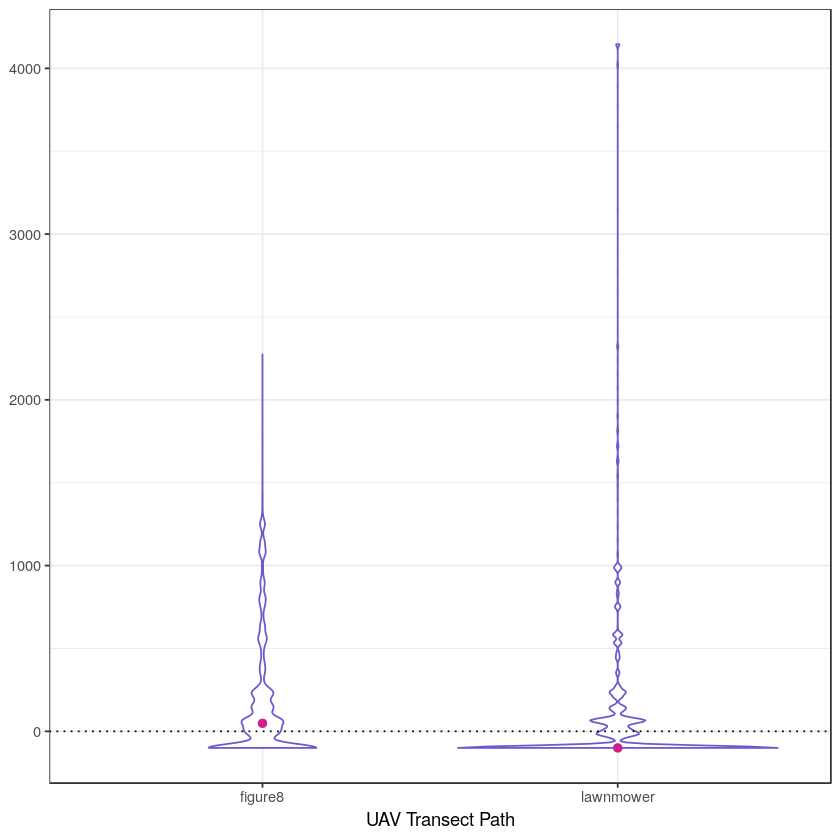

In [66]:
uavp_err <- all_sims %>% 
            group_by(UAV_path) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km),
                          Encounters = sum(Actual_hits))



uavp_box <- all_sims %>% 
             group_by(UAV_path) %>%
                ggplot(aes(x = UAV_path, y = Prop_err)) +
                geom_violin(colour = 'slateblue')+
                stat_summary(fun.y=median, geom="point", size=2, color="violetred") +
                ylab("Percentage Error (%)") +
                xlab('UAV Transect Path') +
                geom_hline(yintercept = 0, linetype = 'dotted', colour = 'black') +
                theme_bw() +
                theme(axis.title.y=element_blank())


uavp_err
uavp_box

In [59]:
pdf(file = paste("../Results/uavp_violin.pdf"))
print(uavp_box)
dev.off()

png 
  2

In [158]:
#write.table(uavp_err, file = "../Results/uavp_table.txt")
uavp_table <- xtable(uavp_err)
print.xtable(uavp_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/uavp_table.tex",
             include.rownames = F)

In [159]:
all_sims$Area_km <- as.factor(all_sims$Area_km)

In [174]:
head(all_sims)

Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,Area2_km,True_Density,Density_km,Prop_err
<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
garmin,1,frigate,straight,lawnmower,yes,0,0,18.099276,17.75318,0.04,0,-100
garmin,1,frigate,straight,lawnmower,yes,0,0,18.099276,17.75318,0.04,0,-100
garmin,1,frigate,straight,lawnmower,no,0,0,18.099276,17.75318,0.04,0,-100
garmin,1,frigate,straight,lawnmower,no,0,0,18.099276,17.75318,0.04,0,-100
garmin,1,frigate,straight,figure8,yes,0,0,18.099276,17.75318,0.04,0,-100
garmin,1,frigate,straight,figure8,yes,0,0,18.099276,17.75318,0.04,0,-100


In [60]:
fig1

ERROR: Error in eval(expr, envir, enclos): object 'fig1' not found


In [61]:
# Group by survey area
fig1 <- all_sims %>%
            group_by(as.factor(Area2_km)) %>%
                   summarise(Accuracy = median(Prop_err),
                             Precision = IQR(Density_km))

colnames(fig1) <- c('Area2_km', 'Accuracy', 'Precision')
#G1 <- 17.753176
#G2 <- 19.06979
#S1 <- 23.005276
#S2 <- 24.80379
#N1 <- 29.972488
#N2 <- 32.41027

Survey_Effort <- c('G1', 'G2', 'S1', 'S2', 'N1', 'N2')
fig1 <- cbind(Survey_Effort, fig1)

Combo <- fig1[,1:2]

unique_ars = unique(all_sims$Area2_km)
all_sims$Area2_km <- as.factor(all_sims$Area2_km)


all_sims = merge(all_sims, Combo)
head(all_sims)

Area2_km,Camera,Speed,Animal,Animal_path,UAV_path,Bias,Total_hits,Actual_hits,Area_km,True_Density,Density_km,Strip_Density,Prop_err,Strip_err,Survey_Effort
<fct>,<fct>,<dbl>,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
17.753176,garmin,1,booby,straight,lawnmower,yes,0,0,23.09908,0.04,0,0,-100,-100,G1
17.753176,garmin,1,booby,straight,lawnmower,no,0,0,23.09908,0.04,0,0,-100,-100,G1
17.753176,garmin,1,booby,straight,figure8,yes,0,0,23.09908,0.04,0,0,-100,-100,G1
17.753176,garmin,1,booby,straight,figure8,no,0,0,23.09908,0.04,0,0,-100,-100,G1
17.753176,garmin,1,booby,stop25,lawnmower,yes,0,0,23.09908,0.04,0,0,-100,-100,G1
17.753176,garmin,1,booby,stop25,lawnmower,no,0,0,23.09908,0.04,0,0,-100,-100,G1


Survey_Effort,Accuracy,Precision,Encounters
<fct>,<dbl>,<dbl>,<int>
G1,8.229425,0.06822331,50577
G2,2.393175,0.12308185,29557
N1,-9.580050,0.10850393,49719
N2,-16.906400,0.10142882,63384
S1,1.116825,0.09837660,48269
S2,-5.740025,0.13515431,34497


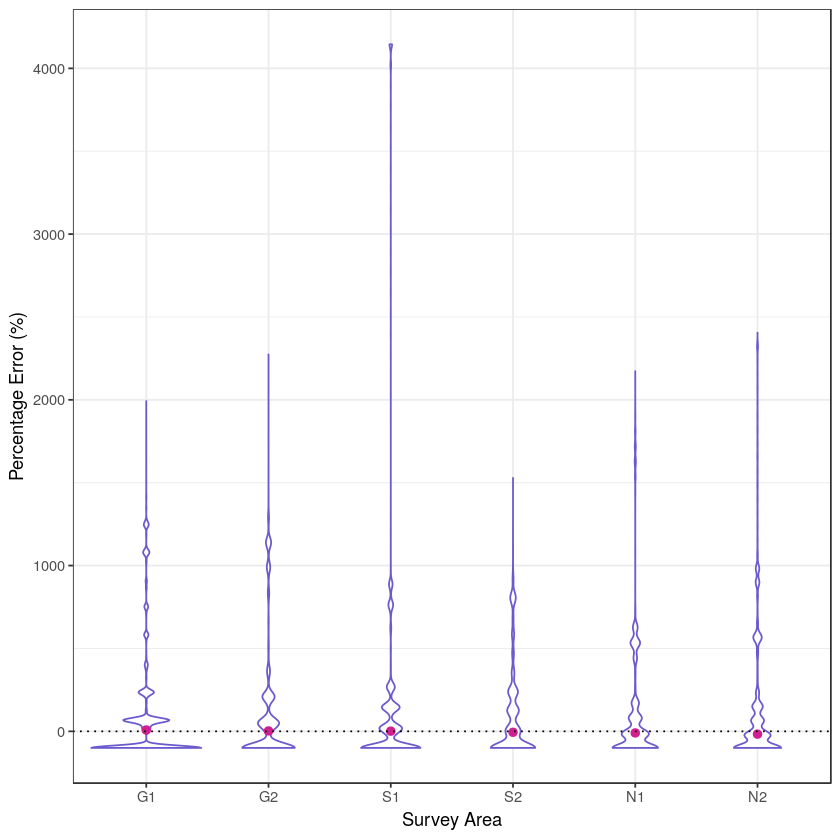

In [65]:
area_err <- all_sims %>% 
            group_by(Survey_Effort) %>%
                summarise(Accuracy = median(Prop_err),
                          Precision = IQR(Density_km), 
                          Encounters = sum(Actual_hits))

level.order = c('G1','G2', 'S1', 'S2', 'N1','N2')

#area_err <- area_err[order(factor(area_err$Combo, levels = level.order)),]
#rownames(area_err) <- NULL


fig1p <- all_sims %>% 
             group_by(Survey_Effort) %>%
                ggplot(aes(x = Survey_Effort, y = Prop_err)) +
                geom_violin(colour = 'slateblue')+
                stat_summary(fun.y=median, geom="point", size=2, color="violetred") +
                #geom_boxplot(width=0.1, colour = 'dodgerblue3') +
                ylab("Percentage Error (%)") +
                xlab('Survey Area') +
                geom_hline(yintercept = 0, linetype = 'dotted', colour = 'black') +
                theme_bw() +
                scale_x_discrete(limits = level.order)

#fig1
area_err
fig1p

In [64]:
pdf(file = paste("../Results/area_violin.pdf"))
print(fig1p)
dev.off()

png 
  2

In [48]:
library(xtable)
sarea_table <- xtable(fig1)
print.xtable(sarea_table, type = "latex", floating = T, caption.placement = "top", file = "../Results/sarea_table.tex",
             include.rownames = F)